
## Detect file encoding to avoid the errors while reading

In [10]:
import chardet

def detect_encoding(file):
    with open(file, 'rb') as file:
        result = chardet.detect(file.read())
        encoding = result['encoding']
        print(f"Detected encoding for {file} : {encoding}")

list_of_csvs=[r'Customers.csv',r'Exchange_rates.csv',r'Products.csv',r'Sales.csv',r'Stores.csv']

for i in list_of_csvs:
    detect_encoding(i)
              

Detected encoding for <_io.BufferedReader name='Customers.csv'> : Windows-1252
Detected encoding for <_io.BufferedReader name='Exchange_rates.csv'> : ascii
Detected encoding for <_io.BufferedReader name='Products.csv'> : ascii
Detected encoding for <_io.BufferedReader name='Sales.csv'> : ascii
Detected encoding for <_io.BufferedReader name='Stores.csv'> : utf-8


## Exploratory Data Analysis (EDA) 

# For Customers

In [3]:
#File Customers
import pandas as pd
df_customers=pd.DataFrame()
df_customers=pd.read_csv(list_of_csvs[0],encoding='windows-1252')

df_customers.head()

CustomerKey  Gender               Name            City State Code  \
0          301  Female      Lilly Harding  WANDEARAH EAST         SA   
1          325  Female       Madison Hull      MOUNT BUDD         WA   
2          554  Female      Claire Ferres       WINJALLOK        VIC   
3          786    Male  Jai Poltpalingada    MIDDLE RIVER         SA   
4         1042    Male    Aidan Pankhurst   TAWONGA SOUTH        VIC   

               State Zip Code    Country  Continent    Birthday  
0    South Australia     5523  Australia  Australia    7/3/1939  
1  Western Australia     6522  Australia  Australia   9/27/1979  
2           Victoria     3380  Australia  Australia   5/26/1947  
3    South Australia     5223  Australia  Australia   9/17/1957  
4           Victoria     3698  Australia  Australia  11/19/1965

In [4]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
#Convert Birthday to Datetime format
df_customers['Birthday']=pd.to_datetime(df_customers['Birthday'], format='%m/%d/%Y')
#check for null values
df_customers.isna().sum()

In [16]:
#seeing what the null values are
df_customers[df_customers.isnull().any(axis=1)]

CustomerKey  Gender                Name               City State Code  \
5304       729681  Female    Rossana Padovesi            Polvica        NaN   
5316       732289    Male        Indro Piccio          Varcaturo        NaN   
5372       742042    Male     Amaranto Loggia          Casaferro        NaN   
5377       742886  Female       Edmonda Capon           Terzigno        NaN   
5378       743343  Female        Ambra Sagese  Pomigliano D'Arco        NaN   
5485       759705    Male    Callisto Lo Duca            Casilli        NaN   
5525       765589    Male  Michelino Lucchesi       Pompei Scavi        NaN   
5531       766410    Male   Adelmio Beneventi             Licola        NaN   
5631       781667  Female          Ilda Manna             Napoli        NaN   
5695       789177    Male   Calogero Folliero      Mariglianella        NaN   

       State Zip Code Country Continent   Birthday  
5304  Napoli    80035   Italy    Europe 1981-04-18  
5316  Napoli    80014   Italy    Europe 1949-02-24  
5372  Napoli    80034   Italy    Europe 1936-03-14  
5377  Napoli    80040   Italy    Europe 1963-08-06  
5378  Napoli    80038   Italy    Europe 1961-01-05  
5485  Napoli    80047   Italy    Europe 1976-08-28  
5525  Napoli    80045   Italy    Europe 1947-11-13  
5531  Napoli    80078   Italy    Europe 1940-01-13  
5631  Napoli    80134   Italy    Europe 1977-05-08  
5695  Napoli    80030   Italy    Europe 2000-03-03

In [17]:
#Replacing State Code null values for Naploli as NA as it is the state code for Napoli 
df_customers.fillna('NA',inplace=True)

#removing spaces in column names as it is better for sql
df_customers.columns = df_customers.columns.str.replace(' ', '')

In [18]:
#checking for duplicated values
df_customers.duplicated().sum()

np.int64(0)

# Box Plot to Identify the Outliers

In [ ]:
import plotly.express as px 
import pandas as pd 
df = df_customers
fig = px.box(df,x="Gender",y="CustomerKey",title='Customer Key Distribution by Gender')
fig.show()

# For Exchange Rates

In [21]:
#File exchange rates

df_exchange=pd.DataFrame()
df_exchange=pd.read_csv(list_of_csvs[1],encoding='ascii')
df_exchange.head()

Date Currency  Exchange
0  1/1/2015      USD    1.0000
1  1/1/2015      CAD    1.1583
2  1/1/2015      AUD    1.2214
3  1/1/2015      EUR    0.8237
4  1/1/2015      GBP    0.6415

In [22]:
df_exchange.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      11215 non-null  object 
 1   Currency  11215 non-null  object 
 2   Exchange  11215 non-null  float64
dtypes: float64(1), object(2)
memory usage: 263.0+ KB


In [ ]:
#Converting Date to date format
df_exchange['Date'] = pd.to_datetime(df_exchange['Date'], format='%m/%d/%Y')
#checking null values
df_exchange.isna().sum()
#Checking for duplicates
df_exchange.duplicated().sum()

In [126]:
df = df_exchange
fig = px.box(df,x="Currency",y="Date",)
fig.show()

# Line Plot to Analyze Exchange Rate Over Time

In [27]:
df = df_exchange
fig = px.line(df,x="Date",y="Exchange",color="Currency")
fig.show()

# For Products

In [28]:
#File Products

df_products=pd.DataFrame()
df_products=pd.read_csv(list_of_csvs[2],encoding='ascii')

df_products.head()

ProductKey                         Product Name    Brand   Color  \
0           1  Contoso 512MB MP3 Player E51 Silver  Contoso  Silver   
1           2    Contoso 512MB MP3 Player E51 Blue  Contoso    Blue   
2           3     Contoso 1G MP3 Player E100 White  Contoso   White   
3           4    Contoso 2G MP3 Player E200 Silver  Contoso  Silver   
4           5       Contoso 2G MP3 Player E200 Red  Contoso     Red   

  Unit Cost USD Unit Price USD  SubcategoryKey Subcategory  CategoryKey  \
0        $6.62         $12.99              101     MP4&MP3            1   
1        $6.62         $12.99              101     MP4&MP3            1   
2        $7.40         $14.52              101     MP4&MP3            1   
3       $11.00         $21.57              101     MP4&MP3            1   
4       $11.00         $21.57              101     MP4&MP3            1   

  Category  
0    Audio  
1    Audio  
2    Audio  
3    Audio  
4    Audio

In [29]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


In [30]:
df_products.describe()

ProductKey  SubcategoryKey  CategoryKey
count  2517.000000     2517.000000  2517.000000
mean   1259.000000      491.810091     4.878824
std     726.739637      229.887134     2.299170
min       1.000000      101.000000     1.000000
25%     630.000000      305.000000     3.000000
50%    1259.000000      406.000000     4.000000
75%    1888.000000      801.000000     8.000000
max    2517.000000      808.000000     8.000000

In [31]:
#Checking for null values
df_products.isna().sum()

ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64

In [32]:
#checking for duplicate values
df_products.duplicated().sum()

np.int64(0)

In [ ]:
#Convert Unit Cost USD and Unit Price USD to float while removing $ and , for computational purposes
df_products['Unit Cost USD'] = df_products['Unit Cost USD'].str.replace(r'[\$,]', '', regex=True).astype(float)
df_products['Unit Price USD'] = df_products['Unit Price USD'].str.replace(r'[\$,]', '', regex=True).astype(float)
#Replacing spaces in column name
df_products.columns = df_products.columns.str.replace(' ', '')

In [ ]:
df = df_products
fig = px.box(df,x="Brand",y="ProductKey")
fig.show()

# Most Sold Brand Products

In [37]:
df = df_products
fig = px.bar(df,x="Brand",y="ProductKey")
fig.show()

# For Sales

In [5]:
#File Sales

df_sales=pd.DataFrame()
df_sales=pd.read_csv(list_of_csvs[3],encoding='ascii')
df_sales.head()

Order Number  Line Item Order Date Delivery Date  CustomerKey  StoreKey  \
0        366000          1   1/1/2016           NaN       265598        10   
1        366001          1   1/1/2016     1/13/2016      1269051         0   
2        366001          2   1/1/2016     1/13/2016      1269051         0   
3        366002          1   1/1/2016     1/12/2016       266019         0   
4        366002          2   1/1/2016     1/12/2016       266019         0   

   ProductKey  Quantity Currency Code  
0        1304         1           CAD  
1        1048         2           USD  
2        2007         1           USD  
3        1106         7           CAD  
4         373         1           CAD

In [6]:
#Replacing spaces in column name
df_sales.columns = df_sales.columns.str.replace(' ', '')

In [7]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   OrderNumber   62884 non-null  int64 
 1   LineItem      62884 non-null  int64 
 2   OrderDate     62884 non-null  object
 3   DeliveryDate  13165 non-null  object
 4   CustomerKey   62884 non-null  int64 
 5   StoreKey      62884 non-null  int64 
 6   ProductKey    62884 non-null  int64 
 7   Quantity      62884 non-null  int64 
 8   CurrencyCode  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


In [41]:
df_sales.describe()

OrderNumber      LineItem   CustomerKey      StoreKey    ProductKey  \
count  6.288400e+04  62884.000000  6.288400e+04  62884.000000  62884.000000   
mean   1.430905e+06      2.164207  1.180797e+06     31.802144   1125.859344   
std    4.532963e+05      1.365170  5.859634e+05     22.978188    709.244010   
min    3.660000e+05      1.000000  3.010000e+02      0.000000      1.000000   
25%    1.121017e+06      1.000000  6.808580e+05      8.000000    437.000000   
50%    1.498016e+06      2.000000  1.261200e+06     37.000000   1358.000000   
75%    1.788010e+06      3.000000  1.686496e+06     53.000000   1650.000000   
max    2.243032e+06      7.000000  2.099937e+06     66.000000   2517.000000   

           Quantity  
count  62884.000000  
mean       3.144790  
std        2.256371  
min        1.000000  
25%        1.000000  
50%        2.000000  
75%        4.000000  
max       10.000000

In [42]:
#Checking for null 
df_sales.isna().sum()

OrderNumber         0
LineItem            0
OrderDate           0
DeliveryDate    49719
CustomerKey         0
StoreKey            0
ProductKey          0
Quantity            0
CurrencyCode        0
dtype: int64

In [43]:
#Changing Delivery Date and Order Date to Datetime format for analysis purpose
df_sales['DeliveryDate'] = pd.to_datetime(df_sales['DeliveryDate'], errors='coerce')
df_sales['OrderDate'] = pd.to_datetime(df_sales['OrderDate'])

In [44]:
#filling null delivery date values to same day as order date as it was bought in store, doing this only for non-online orders or can ask the company team in real world case
df_sales.loc[
    df_sales['DeliveryDate'].isna() & (df_sales['StoreKey'] != 0), 
    'DeliveryDate'
] = df_sales['OrderDate']

In [46]:
df = df_sales
fig = px.box(df,x="CurrencyCode",y="ProductKey",)
fig.show()

# For Stores

In [129]:
#File Stores

df_stores=pd.DataFrame()
df_stores=pd.read_csv(list_of_csvs[4],encoding='utf-8')

df_stores.head()

StoreKey    Country                         State  Square Meters  Open Date
0         1  Australia  Australian Capital Territory          595.0   1/1/2008
1         2  Australia            Northern Territory          665.0  1/12/2008
2         3  Australia               South Australia         2000.0   1/7/2012
3         4  Australia                      Tasmania         2000.0   1/1/2010
4         5  Australia                      Victoria         2000.0  12/9/2015

In [130]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       67 non-null     int64  
 1   Country        67 non-null     object 
 2   State          67 non-null     object 
 3   Square Meters  66 non-null     float64
 4   Open Date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB


In [131]:
df_stores.describe()

StoreKey  Square Meters
count  67.000000      66.000000
mean   33.000000    1402.196970
std    19.485037     576.404058
min     0.000000     245.000000
25%    16.500000    1108.750000
50%    33.000000    1347.500000
75%    49.500000    2000.000000
max    66.000000    2105.000000

In [132]:
#checking null values
df_stores.isna().sum()

StoreKey         0
Country          0
State            0
Square Meters    1
Open Date        0
dtype: int64

In [133]:
#null values are for online as there is no square meters for it
#repalcing with 0
df_stores.fillna(0,inplace=True)

In [134]:
#Replacing spaces in column name
df_stores.columns = df_stores.columns.str.replace(' ', '')

In [135]:
df_stores['OpenDate'] = pd.to_datetime(df_stores['OpenDate'])

# Stores distribution over Country

In [140]:
df = df_stores
fig = px.bar(df,x="Country",y="StoreKey",)
fig.show()

# Further EDA

In [57]:
#Calculating birthday, age range, and store age

from datetime import datetime
def calculate_age(birthday):
    today = datetime.now()
    age = today.year - birthday.year - ((today.month, today.day) < (birthday.month, birthday.day))
    return age
    
#Creating copy as we would need original celaning data to input into sql, table wise

df_customers_copy=df_customers
df_customers_copy['Age'] = df_customers_copy['Birthday'].apply(calculate_age)

def agerange(age):
    if age < 10:
        return 'Under 10'
    elif age < 20:
        return '10-19'
    elif age < 30:
        return '20-29'
    elif age < 40:
        return '30-39'
    elif age < 50:
        return '40-49'
    elif age < 60:
        return '50-59'
    else:
        return '60 and above'

df_customers_copy['AgeRange'] = df_customers_copy['Age'].apply(agerange)

df_stores_copy=df_stores

df_stores_copy['StoreAge']=df_stores_copy['OpenDate'].apply(calculate_age)


In [58]:
df_customers_copy.head()

CustomerKey  Gender               Name            City StateCode  \
0          301  Female      Lilly Harding  WANDEARAH EAST        SA   
1          325  Female       Madison Hull      MOUNT BUDD        WA   
2          554  Female      Claire Ferres       WINJALLOK       VIC   
3          786    Male  Jai Poltpalingada    MIDDLE RIVER        SA   
4         1042    Male    Aidan Pankhurst   TAWONGA SOUTH       VIC   

               State ZipCode    Country  Continent   Birthday  Age  \
0    South Australia    5523  Australia  Australia 1939-07-03   85   
1  Western Australia    6522  Australia  Australia 1979-09-27   45   
2           Victoria    3380  Australia  Australia 1947-05-26   77   
3    South Australia    5223  Australia  Australia 1957-09-17   67   
4           Victoria    3698  Australia  Australia 1965-11-19   59   

       AgeRange  
0  60 and above  
1         40-49  
2  60 and above  
3  60 and above  
4         50-59

In [59]:
df_stores_copy.head()

StoreKey    Country                         State  SquareMeters   OpenDate  \
0         1  Australia  Australian Capital Territory         595.0 2008-01-01   
1         2  Australia            Northern Territory         665.0 2008-01-12   
2         3  Australia               South Australia        2000.0 2012-01-07   
3         4  Australia                      Tasmania        2000.0 2010-01-01   
4         5  Australia                      Victoria        2000.0 2015-12-09   

   StoreAge  
0        16  
1        16  
2        12  
3        14  
4         8

In [60]:
#Renaming columns in customers and stores as they have some location column names
df_customers_copy.rename(columns={
    'City': 'City_customer',
    'StateCode': 'StateCode_customer',
    'State': 'State_customer',
    'ZipCode': 'ZipCode_customer',
    'Country': 'Country_customer',
    'Continent': 'Continent_customer'
}, inplace=True)

df_stores_copy.rename(columns={'Country':'Country_store','State':'State_store'},inplace=True)

# Merging data for Deep Analysis

In [61]:
#Merging Data

df_SalesandStoreMerged = pd.merge(df_sales, df_stores_copy, on='StoreKey', how='left')
df_SalesandStoreMerged.head()

OrderNumber  LineItem  OrderDate DeliveryDate  CustomerKey  StoreKey  \
0       366000         1 2016-01-01   2016-01-01       265598        10   
1       366001         1 2016-01-01   2016-01-13      1269051         0   
2       366001         2 2016-01-01   2016-01-13      1269051         0   
3       366002         1 2016-01-01   2016-01-12       266019         0   
4       366002         2 2016-01-01   2016-01-12       266019         0   

   ProductKey  Quantity CurrencyCode Country_store State_store  SquareMeters  \
0        1304         1          CAD        Canada     Nunavut        1210.0   
1        1048         2          USD        Online      Online           0.0   
2        2007         1          USD        Online      Online           0.0   
3        1106         7          CAD        Online      Online           0.0   
4         373         1          CAD        Online      Online           0.0   

    OpenDate  StoreAge  
0 2015-04-04         9  
1 2010-01-01        14  
2 2010-01-01        14  
3 2010-01-01        14  
4 2010-01-01        14

In [62]:
df_SalesStoresProductsMerged = pd.merge(df_SalesandStoreMerged, df_products, on='ProductKey', how='left')

In [63]:
df_SalesStoresProductsCustomersMerged = pd.merge(df_SalesStoresProductsMerged, df_customers_copy, on='CustomerKey', how='left')

In [64]:
df_finalMerged = pd.merge(df_SalesStoresProductsCustomersMerged, df_exchange,
                     left_on=['OrderDate','CurrencyCode'],
                     right_on=['Date','Currency'],
                     how='left')

In [65]:
df_finalMerged.drop(columns=['Date', 'Currency'],inplace=True)

In [66]:
df_finalMerged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   OrderNumber         62884 non-null  int64         
 1   LineItem            62884 non-null  int64         
 2   OrderDate           62884 non-null  datetime64[ns]
 3   DeliveryDate        62884 non-null  datetime64[ns]
 4   CustomerKey         62884 non-null  int64         
 5   StoreKey            62884 non-null  int64         
 6   ProductKey          62884 non-null  int64         
 7   Quantity            62884 non-null  int64         
 8   CurrencyCode        62884 non-null  object        
 9   Country_store       62884 non-null  object        
 10  State_store         62884 non-null  object        
 11  SquareMeters        62884 non-null  float64       
 12  OpenDate            62884 non-null  datetime64[ns]
 13  StoreAge            62884 non-null  int64     

In [67]:
#Calculating Reveunue Per Customer USD and Profit Per CustomerUSD
df_finalMerged['RevenueUSD'] = df_finalMerged['Quantity'] * df_finalMerged['UnitPriceUSD']
df_finalMerged['ProfitUSD'] = df_finalMerged['RevenueUSD']-(df_finalMerged['Quantity'] * df_finalMerged['UnitCostUSD'])

In [68]:
#Creating a Frequency Column to the data

# Count the number of orders per customer
order_counts = df_finalMerged.groupby('CustomerKey')['OrderNumber'].count()

# function to Categorize frequency
def categorize_frequency(count):
    if count >= 1 and count <= 4:
        return 'Occasional'
    elif count >= 5 and count <= 10:
        return 'Moderate'
    elif count > 10:
        return 'Frequent'
    else:
        return 'Unknown'

# Apply categorization to get a Series of categories
order_counts_category = order_counts.apply(categorize_frequency)

# Merge this frequency information back into the original DataFrame
# Reset index to merge
order_counts_category = order_counts_category.reset_index(name='Frequency')

# Merge with the original DataFrame
df_finalMerged = df_finalMerged.merge(order_counts_category, on='CustomerKey', how='left')

# Gender Disrtibution by Country

In [ ]:
import plotly.express as px

# Count occurrences of each gender within each country
gender_counts = df_finalMerged.groupby(['Country_customer', 'Gender']).size().reset_index(name='Count')

# Plotting gender distribution within each country
fig = px.bar(gender_counts, x='Country_customer', y='Count', color='Gender', title='Gender Distribution by Country',
             labels={'Country_customer': 'Country', 'Count': 'Number of Customers'},
             color_discrete_sequence=px.colors.qualitative.Dark2)

fig.update_layout(xaxis_title='Country', yaxis_title='Number of Customers', barmode='group')
fig.show()




"Customer distribution remains relatively consistent across different gender categories. Notably, the United States boasts the highest number of customers compared to other countries."



# Top 10 Cities with Most Customers

In [ ]:
import plotly.express as px


# Count occurrences of each city
customer_counts = df_finalMerged['City_customer'].value_counts()

# Getting the top 10 cities
top_10_cities = customer_counts.head(10).reset_index()
top_10_cities.columns = ['City_customer', 'Count']

# Plotting the top 10 cities with the most customers
fig = px.bar(top_10_cities, x='City_customer', y='Count', title='Top 10 Cities with Most Customers',
             labels={'City_customer': 'City', 'Count': 'Number of Customers'},
             color='City_customer', color_discrete_sequence=px.colors.qualitative.Set3)

fig.update_layout(xaxis_title='City', yaxis_title='Number of Customers', 
                  xaxis_tickangle=-45, showlegend=False)
fig.show()


From the analysis, it's clear that multiple cities in the United States feature prominently among the top ten cities with the highest number of customers. Interestingly, Toronto tops the list, followed by Montreal and Calgary, highlighting a substantial interest in our products in these Canadian cities as well.



# Top 10 Profitable Cities 

In [ ]:
import plotly.express as px

# Calculating profits by City
city_profits = df_finalMerged.groupby(['City_customer'])['ProfitUSD'].sum().sort_values(ascending=False)

# Convert to DataFrame for better readability
city_profits_df = city_profits.reset_index()

top10_cities_profits = city_profits_df.head(10)

# Plotting the top 10 profitable cities
fig = px.bar(top10_cities_profits, x='City_customer', y='ProfitUSD', title='Top 10 Profitable Cities',
             labels={'City_customer': 'City', 'ProfitUSD': 'Total Profit (USD)'},
             color='City_customer', color_discrete_sequence=px.colors.qualitative.Set2)

fig.update_layout(xaxis_title='City', yaxis_title='Total Profit (USD)', 
                  xaxis_tickangle=-45, showlegend=False)
fig.show()


This analysis reveals robust customer bases in key U.S. states, complemented by notable interest from Canada and Germany. These findings offer valuable insights into market concentration and highlight potential areas for targeted engagement and strategic expansion.

In [ ]:
import plotly.express as px

# Count occurrences of each age range
ageRange_counts = df_finalMerged['AgeRange'].value_counts()

# Convert to DataFrame for better readability
ageRange_df = ageRange_counts.reset_index()
ageRange_df.columns = ['AgeRange', 'Count']

# Plotting the distribution of customers by age range
fig = px.bar(ageRange_df, x='AgeRange', y='Count', title='Distribution of Customers by Age',
             labels={'AgeRange': 'Age Range', 'Count': 'Number of Customers'},
             color='AgeRange', color_discrete_sequence=px.colors.qualitative.Set3)

fig.update_layout(xaxis_title='Age Range', yaxis_title='Number of Customers', 
                  xaxis_tickangle=-45, showlegend=False)
fig.show()


The analysis indicates that the majority of our customers are aged 60 and above. This demographic trend highlights a significant interest and engagement from older adults, potentially shaping product preferences and marketing strategies. By targeting this age group with customized offerings and communications, we can enhance customer satisfaction and retention.

In [74]:
# Calculating profits by AgeRange
agerange_profits = df_finalMerged.groupby(['AgeRange'])['ProfitUSD'].sum().sort_values(ascending=False)
agerange_profits

AgeRange
60 and above    14344878.78
30-39            5072052.95
50-59            4891802.61
40-49            4798178.72
20-29            3555775.32
Name: ProfitUSD, dtype: float64

In [75]:
#Seeing Frequency group as well 

df_finalMerged['Frequency'].value_counts()

Frequency
Moderate      29903
Frequent      17288
Occasional    15693
Name: count, dtype: int64

In [76]:
#Calculating Profits by Frequency Range
freq_profits = df_finalMerged.groupby(['Frequency'])['ProfitUSD'].sum().sort_values(ascending=False)
freq_profits

Frequency
Moderate      15766046.80
Frequent       8849080.35
Occasional     8047561.23
Name: ProfitUSD, dtype: float64

Grasping the frequency of customer visits allows us to fine-tune our advertising strategies with greater precision. By segmenting customers according to their engagement levels, we can devise targeted marketing campaigns that resonate with specific groups. This approach not only enhances customer engagement but also maximizes the effectiveness of our advertising efforts.



In [77]:
#Seeing top currencies used as well
df_finalMerged['CurrencyCode'].value_counts()

CurrencyCode
USD    33767
EUR    12621
GBP     8140
CAD     5415
AUD     2941
Name: count, dtype: int64

Our analysis indicates that the majority of customers transact in USD, with substantial numbers also utilizing EUR and GBP, reflecting their respective regions. Additionally, the significant interest from Canadian and Australian markets underscores a diverse international customer base.




In [78]:
#Seeing if there is any co-relation between currency exchange rates and revenue

# Initialize an empty list to store correlation results
correlation_results = []

# Group by Currency and calculate correlation for each group
for currency, group in df_finalMerged.groupby('CurrencyCode'):
    correlation = group[['RevenueUSD', 'Exchange']].corr().iloc[0, 1]
    correlation_results.append({
        'Currency': currency,
        'Correlation': correlation
    })

# Convert results to a DataFrame
correlation_results_df = pd.DataFrame(correlation_results)

# Display the correlation results
print("Correlation between RevenueUSD and ExchangeRateOnThatDate by Currency:")
print(correlation_results_df)

Correlation between RevenueUSD and ExchangeRateOnThatDate by Currency:
  Currency  Correlation
0      AUD     0.007797
1      CAD    -0.015094
2      EUR    -0.018534
3      GBP    -0.002628
4      USD          NaN


The data reveals that the correlations for all currencies are extremely low, suggesting that fluctuations in exchange rates for AUD, CAD, EUR, and GBP have minimal to negligible impact on revenue in USD. This insight implies that revenue remains largely unaffected by these currency changes.


In [79]:
#Finding top 10 Products Sold

product_counts = df_finalMerged['ProductName'].value_counts()

print(product_counts.nlargest(10))


ProductName
Adventure Works Desktop PC2.30 MD230 Black    162
Adventure Works Desktop PC2.30 MD230 White    158
WWI Desktop PC1.80 E1800 White                158
WWI Desktop PC1.60 E1600 Black                158
WWI Desktop PC1.80 E1801 Black                157
Adventure Works Desktop PC1.80 ED180 White    156
WWI Desktop PC1.60 E1600 Silver               156
WWI Desktop PC1.80 E1800 Silver               156
Adventure Works Desktop PC1.60 ED160 Black    155
WWI Desktop PC2.33 X2330 Black                154
Name: count, dtype: int64


In [80]:
#Finding top 10 Profitable Products
product_profits = df_finalMerged.groupby(['ProductName'])['ProfitUSD'].sum().sort_values(ascending=False)

print(product_profits.nlargest(10))


ProductName
WWI Desktop PC2.33 X2330 Black                 337986.00
Adventure Works Desktop PC2.33 XD233 Silver    311663.95
Adventure Works Desktop PC2.33 XD233 Brown     310368.05
Adventure Works Desktop PC2.33 XD233 Black     299352.90
Adventure Works Desktop PC2.33 XD233 White     292225.45
WWI Desktop PC2.33 X2330 White                 283908.24
WWI Desktop PC2.33 X2330 Brown                 282679.20
Adventure Works 52" LCD HDTV X590 White        263727.12
Adventure Works 52" LCD HDTV X590 Black        250152.93
WWI Desktop PC2.33 X2330 Silver                240891.84
Name: ProfitUSD, dtype: float64


The data shows that Computer Products are the top choice among customers. To gain a deeper understanding of customer preferences, we can also analyze the top brands within this category. This will help us identify key players and tailor our strategies to leverage brand popularity for better customer engagement and sales optimization. 

# Distribution Of Sales by Categories

In [ ]:
import plotly.express as px


# Count occurrences of each category
category_counts = df_finalMerged['Category'].value_counts()

# Convert to DataFrame for better readability
category_df = category_counts.reset_index()
category_df.columns = ['Category', 'Count']

# Plotting the distribution of sales by categories
fig = px.bar(category_df, x='Category', y='Count', title='Distribution of Sales by Categories',
             labels={'Category': 'Category', 'Count': 'Number of Sales'},
             color='Category', color_discrete_sequence=px.colors.qualitative.Set3)

fig.update_layout(xaxis_title='Category', yaxis_title='Number of Sales', 
                  xaxis_tickangle=-45, showlegend=False)
fig.show()


In [82]:
# Calculating profits by Category
category_profits = df_finalMerged.groupby(['Category'])['ProfitUSD'].sum().sort_values(ascending=False)

category_profits

Category
Computers                        11277447.90
Home Appliances                   6296338.85
Cameras and camcorders            3919800.99
TV and Video                      3536694.39
Cell phones                       3498626.54
Music, Movies and Audio Books     1909259.17
Audio                             1827851.77
Games and Toys                     396668.77
Name: ProfitUSD, dtype: float64

This distribution highlights a robust demand for technology, entertainment, and recreational products, along with a notable interest in household items. By understanding these preferences, we can optimize inventory management, fine-tune targeted marketing efforts, and develop products that better align with customer interests, ultimately enhancing engagement and satisfaction. 


# Distribution Of Sales by Subcategories

In [83]:
import plotly.express as px
import pandas as pd

# Assuming df_finalMerged is your DataFrame
# Count occurrences of each subcategory
subcategory_counts = df_finalMerged['Subcategory'].value_counts()

# Convert to DataFrame for better readability
subcategory_df = subcategory_counts.reset_index()
subcategory_df.columns = ['Subcategory', 'Count']

# Plotting the distribution of sales by subcategories using Plotly Express
fig = px.bar(subcategory_df, x='Subcategory', y='Count', title='Distribution of Sales by Subcategories',
             labels={'Subcategory': 'SubCategory', 'Count': 'Number of Sales'},
             color='Subcategory', color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(xaxis_title='SubCategory', yaxis_title='Number of Sales', 
                  xaxis_tickangle=-45, showlegend=False)
fig.show()


In [84]:
# Calculating profits by SubCategory
subcategory_profits = df_finalMerged.groupby(['Subcategory'])['ProfitUSD'].sum().sort_values(ascending=False)
subcategory_profits

Subcategory
Desktops                            5629155.33
Televisions                         2631908.38
Projectors & Screens                2357342.37
Water Heaters                       2039982.30
Camcorders                          2018119.70
Movie DVD                           1909259.17
Laptops                             1793677.71
Touch Screen Phones                 1738593.81
Smart phones & PDAs                 1590479.02
Refrigerators                       1316366.73
Washers & Dryers                    1197517.99
Digital SLR Cameras                 1170056.98
Monitors                             950021.49
Bluetooth Headphones                 806865.02
Recording Pen                        741086.69
Coffee Machines                      692610.86
Microwaves                           650954.38
Digital Cameras                      510597.56
Printers, Scanners & Fax             428520.56
Home Theater System                  398020.77
Download Games                       344731.16
C

By analyzing the top and least-performing subcategories, we gain a clear understanding of where the strengths and opportunities lie. 

In [86]:
# Calculating profits by Brands
brand_profits = df_finalMerged.groupby(['Brand'])['ProfitUSD'].sum().sort_values(ascending=False)
brand_profits

Brand
Adventure Works         6937318.88
Contoso                 6321209.14
Wide World Importers    5367028.30
Fabrikam                4061475.11
The Phone Company       3057762.90
Proseware               1935287.10
Litware                 1553765.19
Southridge Video        1522876.84
A. Datum                 883502.31
Northwind Traders        649413.31
Tailspin Toys            373049.30
Name: ProfitUSD, dtype: float64

Similarly, by examining the top and least-performing brands, we can clearly identify areas of strength and opportunities for growth. This analysis helps us understand which brands resonate most with customers, and which may need strategic improvements. Leveraging this insight allows us to optimize our branding efforts, enhance customer satisfaction, and drive sales growth.



# Correlation between the RevenueUSD and StoreAge and StoreSquarefeet

              SquareMeters  StoreAge  RevenueUSD
SquareMeters      1.000000  0.289560    0.001338
StoreAge          0.289560  1.000000   -0.004518
RevenueUSD        0.001338 -0.004518    1.000000


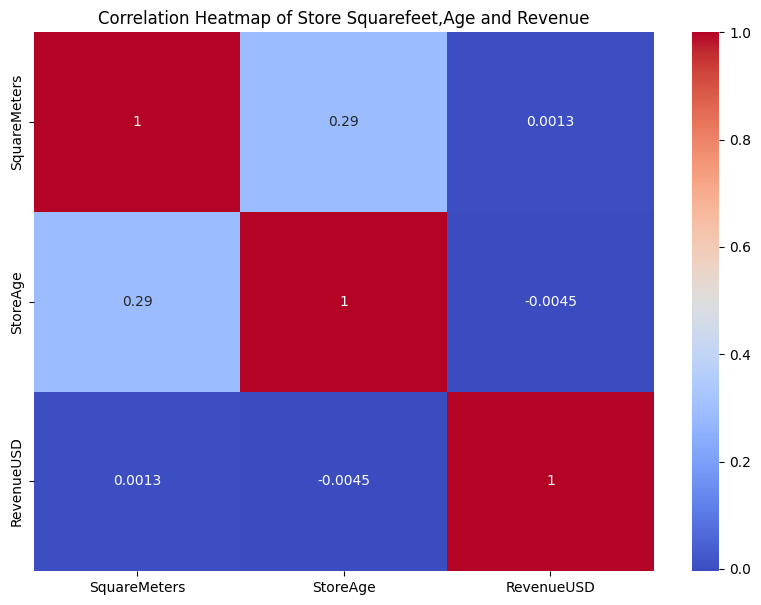

In [141]:

import matplotlib.pyplot as plt
import seaborn as sns
# Can see if store size and age have any co-relation to revenue

filtered_df = df_finalMerged[(df_finalMerged['SquareMeters'] != 0) & (df_finalMerged['StoreAge'] != 0)]

correlation_matrix = filtered_df[['SquareMeters', 'StoreAge', 'RevenueUSD']].corr()

print(correlation_matrix)

plt.figure(figsize=(10, 7))

# Create a heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Add titles and labels
plt.title('Correlation Heatmap of Store Squarefeet,Age and Revenue')
plt.show()

Indeed, the data indicates no significant correlation between RevenueUSD and both StoreAge and StoreSquareFeet. This suggests that factors like the age and size of a store do not directly impact its revenue. 

Understanding these insights can help us focus on other potential drivers of revenue, such as product mix, customer service, and location-specific marketing strategies, rather than attributing revenue changes to store characteristics alone.



In [88]:
# Can see Store with Most Revenue and it's Location

# Group by StoreKey,Country,State and sum the ProfitUSD
store_profit = df_finalMerged.groupby(['StoreKey', 'Country_store','State_store'])['ProfitUSD'].sum()

# Sort the stores by profit in descending order
top_stores = store_profit.sort_values(ascending=False).head(50)

# Convert to DataFrame for better readability
top_stores_df = top_stores.reset_index()

# Display results
print(top_stores_df)

    StoreKey   Country_store                   State_store   ProfitUSD
0          0          Online                        Online  6672692.64
1         55   United States                        Nevada   830551.75
2         50   United States                        Kansas   819659.12
3         54   United States                      Nebraska   810300.06
4         57   United States                    New Mexico   784095.76
5          9          Canada         Northwest Territories   774757.55
6         61   United States                South Carolina   764997.20
7         45   United States                   Connecticut   761271.82
8         59   United States                        Oregon   754702.32
9         64   United States                 Washington DC   745283.99
10        43   United States                        Alaska   741093.00
11        66   United States                       Wyoming   723190.21
12         8          Canada     Newfoundland and Labrador   723081.21
13    

The online store stands out as the top performer with an impressive profit of $6,672,692.64, clearly surpassing physical stores in profitability. This underscores the substantial success of our online operations. Additionally, the majority of profits from physical stores are concentrated in the USA, with notable contributions from Canada, particularly the Northwest Territories. It's crucial to emphasize that the online store remains the most profitable segment, highlighting the importance of our digital strategy.



In [89]:
#Find average profits by day,week,month,year

# Group by 'Order Date' and calculate total revenue per day
daily_revenue = df_finalMerged.groupby('OrderDate')['RevenueUSD'].sum().reset_index()

# Calculate the average revenue per day
average_daily_revenue = daily_revenue['RevenueUSD'].median()
print(f'Average Revenue Per Day: ${average_daily_revenue:.2f}')

# Resample by week and calculate total revenue per month
weekly_revenue = df_finalMerged.resample('W', on='OrderDate')['RevenueUSD'].sum().reset_index()

# Calculate the average revenue per week
average_weekly_revenue = weekly_revenue['RevenueUSD'].median()
print(f'Average Revenue Per Week: ${average_weekly_revenue:.2f}')

# Resample by month and calculate total revenue per month
monthly_revenue = df_finalMerged.resample('M', on='OrderDate')['RevenueUSD'].sum().reset_index()

# Calculate the average revenue per month, taking median as it may have outliers
average_monthly_revenue = monthly_revenue['RevenueUSD'].median()
print(f'Average Revenue Per Month: ${average_monthly_revenue:.2f}')

# Resample by year and calculate total revenue per year
yearly_revenue = df_finalMerged.resample('Y', on='OrderDate')['RevenueUSD'].sum().reset_index()

# Calculate the average revenue per year
average_yearly_revenue = yearly_revenue['RevenueUSD'].mean()
print(f'Average Revenue Per Year: ${average_yearly_revenue:.2f}')


Average Revenue Per Day: $26792.28
Average Revenue Per Week: $160329.93
Average Revenue Per Month: $672552.73
Average Revenue Per Year: $9292579.93


C:\Users\peer1\AppData\Local\Temp\ipykernel_14060\2790816349.py:18: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\peer1\AppData\Local\Temp\ipykernel_14060\2790816349.py:25: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



# Analyzing Monthly Revenue

In [ ]:
import plotly.express as px



# Resample by month and calculate total revenue
monthly_revenue = df_finalMerged.resample('M', on='OrderDate')['RevenueUSD'].sum().reset_index()

# Plotting the monthly revenue
fig = px.line(monthly_revenue, x='OrderDate', y='RevenueUSD', title='Monthly Revenue',
              labels={'OrderDate': 'Order Date', 'RevenueUSD': 'Revenue (USD)'},
              line_shape='linear')

fig.update_traces(line=dict(color='red'))
fig.update_layout(xaxis_title='Order Date', yaxis_title='Revenue (USD)', 
                  xaxis_tickangle=-45, xaxis=dict(showgrid=True, gridcolor='LightGray'), 
                  yaxis=dict(showgrid=True, gridcolor='LightGray'))

fig.show()


C:\Users\peer1\AppData\Local\Temp\ipykernel_14060\1150816216.py:6: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [91]:
#We want to calculate revenue for each month to see trends

# Extract month from the OrderDate
df_finalMerged['Month'] = df_finalMerged['OrderDate'].dt.month

# Filter data for April (Month 4)
for i in range(1,13):
    month_data = df_finalMerged[df_finalMerged['Month'] == i]

    # Calculate total revenue for the month
    total_revenue_month = month_data['RevenueUSD'].sum()

    print(f'Total Revenue for Month {i}: ${total_revenue_month:,.2f}')


Total Revenue for Month 1: $6,759,981.20
Total Revenue for Month 2: $7,842,476.23
Total Revenue for Month 3: $2,625,522.85
Total Revenue for Month 4: $607,334.05
Total Revenue for Month 5: $4,757,983.80
Total Revenue for Month 6: $4,293,036.54
Total Revenue for Month 7: $3,852,415.81
Total Revenue for Month 8: $4,085,169.32
Total Revenue for Month 9: $4,363,863.61
Total Revenue for Month 10: $4,315,027.44
Total Revenue for Month 11: $4,756,059.88
Total Revenue for Month 12: $7,496,608.86


Indeed, the analysis indicates that April is the lowest performing month, while the top three months are December, January, and February. This suggests a significant spike in customer activity and revenue during the winter months, likely driven by holiday shopping and New Year's promotions. Understanding these seasonal trends can help in planning marketing campaigns and inventory management to capitalize on peak periods and address the slower month of April.


In [ ]:
# Saving The Cleaned Data
df_customers.to_csv("Customers_Cleaned.csv", index=False)
df_exchange.to_csv("ExchangeRates_Cleaned.csv", index=False)
df_products.to_csv("Products_Cleaned.csv", index=False)
df_sales.to_csv("Sales_Cleaned.csv", index=False)
df_stores.to_csv("Stores_Cleaned.csv", index=False)
df_finalMerged.to_csv("Merged_Cleaned.csv", index=False)

# Storing Data in MYSQL

In [ ]:
from mysql import connector
myconnection = connector.connect(
    host= "localhost",
    user="root",
    password="123456789"
)
cursor =myconnection.cursor() 
query = "Create database if  not exists dataspark"
cursor.execute(query)                                          

# Assuming you have six dataframes
df_customers = df_customers
df_exchange = df_exchange
df_products = df_products
df_sales = df_sales
df_stores = df_stores
df_merged = df_finalMerged


# MySQL connection
myconnection = connector.connect(
    host='127.0.0.1',
    user='root',
    passwd='123456789',
    database='dataspark'
)

def process_and_insert_data(df, table_name):
    # Define custom type mapping
    type_mapping = {
        "float64": "FLOAT",
        "object": "TEXT",
        "int64": "INT",
        "datetime64[ns]": "DATE"
    }

    column_definitions = ", ".join(
        f"`{col}` {type_mapping.get(str(dtype), 'TEXT')}"
        for col, dtype in zip(df.columns, df.dtypes)
    )

    cursor = myconnection.cursor()
    
    # Create table
    create_table_query = f"CREATE TABLE IF NOT EXISTS `{table_name}` ({column_definitions})"
    cursor.execute(create_table_query)
    
    # Insert data into the table
    insert_query = f"INSERT INTO `{table_name}` VALUES ({', '.join(['%s'] * len(df.columns))})"

    for _, row in df.iterrows():
        cursor.execute(insert_query, tuple(row))

    myconnection.commit()
    cursor.close()

# List of dataframes and corresponding table names
dfs_and_tables = [
    (df_customers, "customers"),
    (df_exchange, "exchange_rates"),
    (df_products, "products"),
    (df_sales, "sales"),
    (df_stores, "stores"),
    (df_merged, "merged_data")
]

try:
    for df, table_name in dfs_and_tables:
        process_and_insert_data(df, table_name)
    print("All data successfully imported into the database.")

except Exception as e:
    print(f"An error occurred: {e}")

finally:
    myconnection.close()


All data successfully imported into the database.
